In [1]:
try:
    import fastlane_bot.tools.invariants.functions as f
    from fastlane_bot.tools.invariants.kernel import Kernel
    from fastlane_bot.testing import *

except:
    import tools.invariants.functions as f
    from tools.invariants.kernel import Kernel
    from tools.testing import *

import numpy as np
import math as m
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12,6]

print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(f.Function))
print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(Kernel))

imported m, np, pd, plt, os, sys, decimal; defined iseq, raises, require, Timer
Function v0.9.7 (21/Mar/2024)
Kernel v0.9.1 (26/Jan/2024)


# AMM Functions  (Invariants Module; NBTest068)

## Constant product style AMMs [NOTEST]

In [2]:
rg = rg0 = (1,20)
xlim = (0,20)
ylim = (0,10)
p = lambda fn: str(f.fmt(fn.params(classname=True), ".2f"))

### Plain constant product (Bancor V2.1, Bancor V3; Uniswap V2)

$$
y(x) = \frac k x
$$

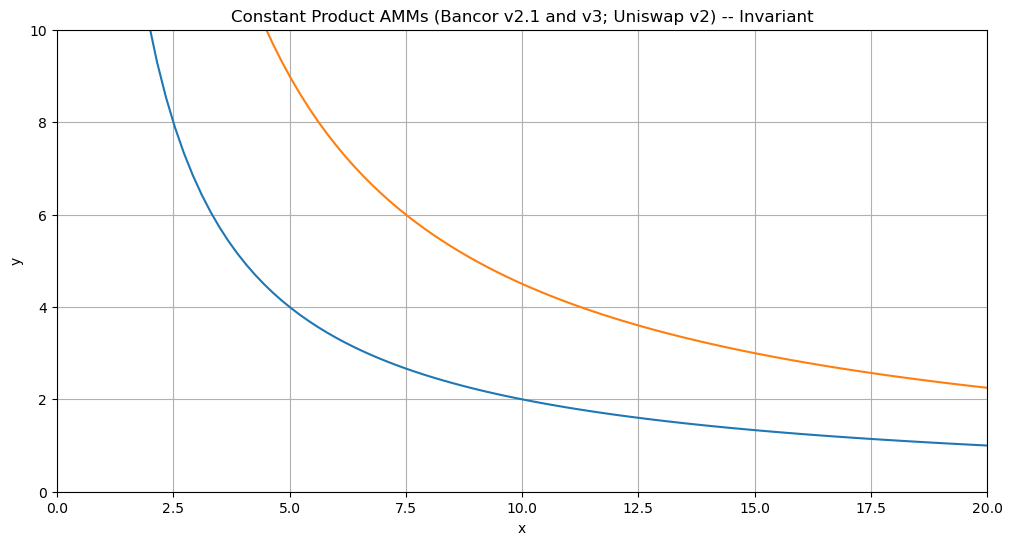

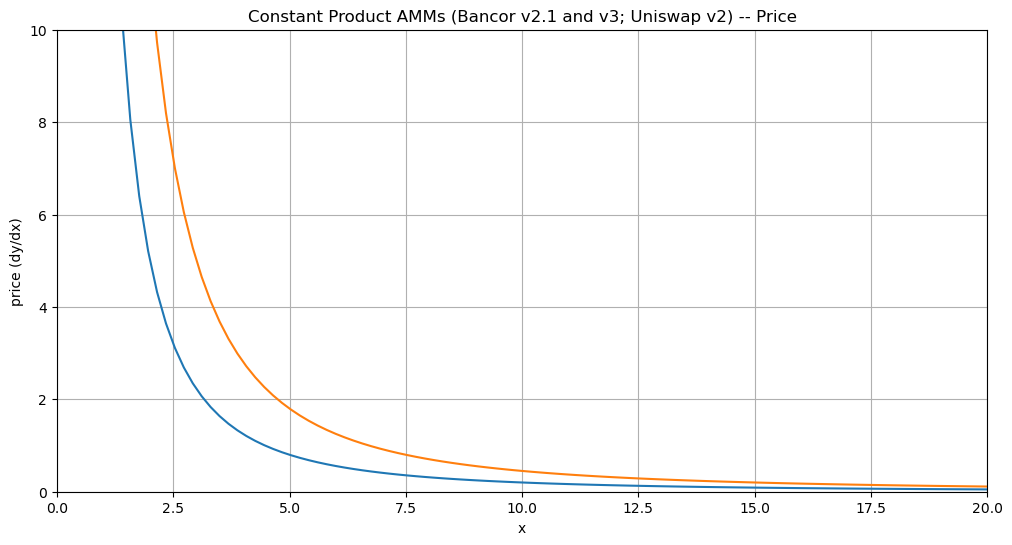

In [3]:
assert f.CPMM is f.CPMMFunction
assert f.BancorV21 is f.CPMMFunction
assert f.BancorV3 is f.CPMMFunction
assert f.UniV2 is f.CPMMFunction
fn1 = f.CPMM(k=20)
fn2 = fn1.update(k=fn1.k*1.5**2)
for fn in [fn1, fn2]:
    fn.plot(*rg, label=f"{p(fn)}")
plt.title("Constant Product AMMs (Bancor v2.1 and v3; Uniswap v2) -- Invariant")
plt.xlim(*xlim)
plt.ylim(*ylim)
plt.show()

for fn in [fn1, fn2]:
    fn.plot(*rg, func=fn.p, label=f"{p(fn)}")
plt.title("Constant Product AMMs (Bancor v2.1 and v3; Uniswap v2) -- Price")
plt.ylabel("price (dy/dx)")
plt.xlim(*xlim)
plt.ylim(*ylim)
plt.show()

### Levered constant product (virtual token balances)

$$
y(x) + y_0 = \frac k {x+x_0}
$$

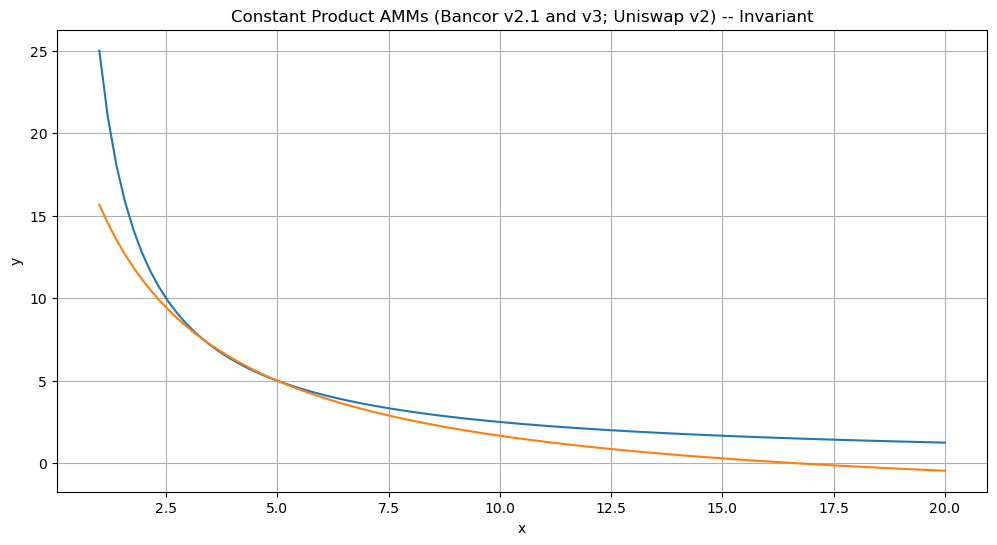

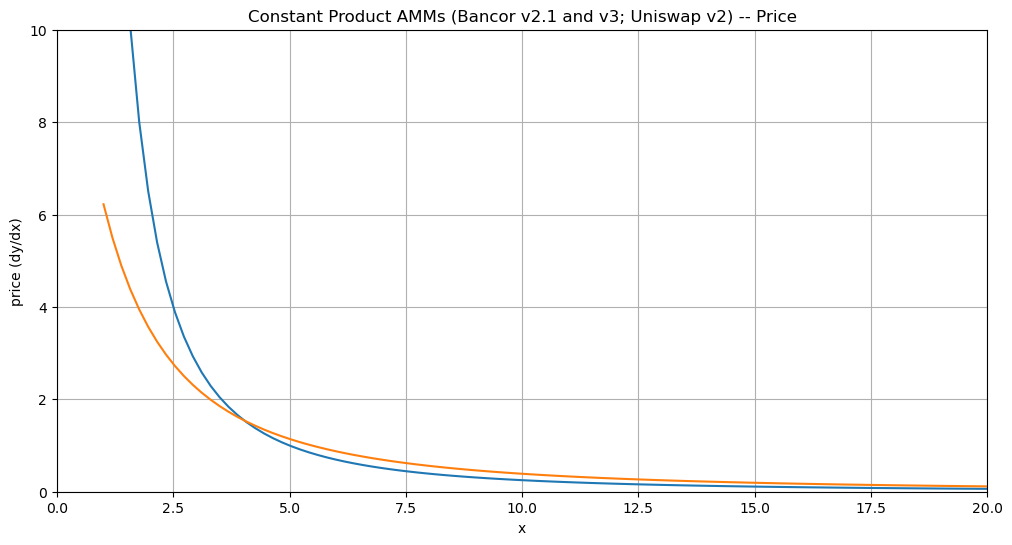

In [4]:
assert f.LCPMM is f.VirtualTokenBalancesCPMMFunction
assert f.VTBCPMM is f.VTBCPMM
fn1 = f.LCPMM(k=5*5)
fn2 = fn1.update(k=7*8, x0=2, y0=3)
for fn in [fn1, fn2]:
    fn.plot(*rg, label=f"{p(fn)}")
plt.title("Constant Product AMMs (Bancor v2.1 and v3; Uniswap v2) -- Invariant")
# plt.xlim(*xlim)
# plt.ylim(*ylim)
plt.show()

for fn in [fn1, fn2]:
    fn.plot(*rg, func=fn.p, label=f"{p(fn)}")
plt.title("Constant Product AMMs (Bancor v2.1 and v3; Uniswap v2) -- Price")
plt.ylabel("price (dy/dx)")
plt.xlim(*xlim)
plt.ylim(*ylim)
plt.show()

#### `from_xpxp`

alternative constructor, determining the curve by two points on a x-axis $x_a, x_b$ and the associated prices $p_a, p_b$; note that we are missing a parameter, $y_0$, which is a non-financial parameter in this case as a shift in the y direction does not affect prices as long as the curve does not run out of tokens

We have the following equations:

$$
\frac k {(x_0+x_a)^2} = p_a,\quad \frac k {(x_0+x_b)^2} = p_b
$$


Solving for $x_0, k$ we find

$$
x_0 = \frac{-(p_a x_a) + \sqrt{p_a p_b (x_a - x_b)^2} + p_b x_b}{p_a - p_b}
$$

$$
k = p_a \left(x_a + \frac{-(p_a x_a) + \sqrt{p_a p_b (x_a - x_b)^2} + p_b x_b}{p_a - p_b}\right)^2
= p_a (x_a + x_0)^2
$$

or 

    x0 = (-(pa * xa) + m.sqrt(pa * pb * (xa - xb)**2) + pb * xb) / (pa - pb)
    k  = pa * ((xa + (-(pa * xa) + m.sqrt(pa * pb * (xa - xb)**2) + pb * xb) / (pa - pb)) ** 2)
    k = pa * (xa + x0) ** 2



In [5]:
assert raises(f.LCPMM.from_xpxp, xa=20, pa=2, xb=10, pb=1) == 'xa=20 must be < xb=10'
assert raises(f.LCPMM.from_xpxp, xa=10, pa=2, xb=10, pb=1) == 'xa=10 must be < xb=10'
assert raises(f.LCPMM.from_xpxp, xa=10, pa=1, xb=20, pb=2) == 'pa=1 must be > pb=2'
assert raises(f.LCPMM.from_xpxp, xa=10, pa=1, xb=20, pb=1) == 'pa=1 must be > pb=1'
assert raises(f.LCPMM.from_xpxp, 1,2,3,4) # kwargs!
assert raises(f.LCPMM.from_xpxp, xa=10, pa=2, xb=20, pb=1, y0=1, ya=1, yb=1) == 'at most 1 of y0, ya, yb can be given, but got 3 [y0=1, ya=1, yb=1]'
assert raises(f.LCPMM.from_xpxp, xa=10, pa=2, xb=20, pb=1, y0=1, ya=1)
assert raises(f.LCPMM.from_xpxp, xa=10, pa=2, xb=20, pb=1, y0=1, yb=1)
assert raises(f.LCPMM.from_xpxp, xa=10, pa=2, xb=20, pb=1, ya=1, yb=1)

In [6]:
prm = dict(xa=10, pa=2, xb=20, pb=1)

fn = f.LCPMM.from_xpxp(**prm)
fn0 = fn
assert iseq(fn.p(prm["xa"]), prm["pa"])
assert iseq(fn.p(prm["xb"]), prm["pb"])
assert fn.y0 == 0
ya = fn(prm["xa"])
yb = fn(prm["xb"])

fn = f.LCPMM.from_xpxp(**prm, y0=10)
assert fn.k == fn0.k
assert fn.x0 == fn0.x0
assert fn.y0 != fn0.y0
assert iseq(fn.p(prm["xa"]), prm["pa"])
assert iseq(fn.p(prm["xb"]), prm["pb"])
assert fn.y0 == 10
assert fn(prm["xa"]) == ya-10
assert fn(prm["xb"]) == yb-10

In [7]:
fn = f.LCPMM.from_xpxp(**prm, ya=100)
assert fn.k == fn0.k
assert fn.x0 == fn0.x0
assert fn.y0 != fn0.y0
assert iseq(fn.p(prm["xa"]), prm["pa"])
assert iseq(fn.p(prm["xb"]), prm["pb"])
assert fn(prm["xa"]) == 100

In [8]:
fn = f.LCPMM.from_xpxp(**prm, yb=100)
assert fn.k == fn0.k
assert fn.x0 == fn0.x0
assert fn.y0 != fn0.y0
assert iseq(fn.p(prm["xa"]), prm["pa"])
assert iseq(fn.p(prm["xb"]), prm["pb"])
assert fn(prm["xb"]) == 100

### Levered constant product (Uniswap V3)

UniV3Function(L=5, Pa=4, Pb=2)
UniV3Function(L=5, Pa=4, Pb=2)


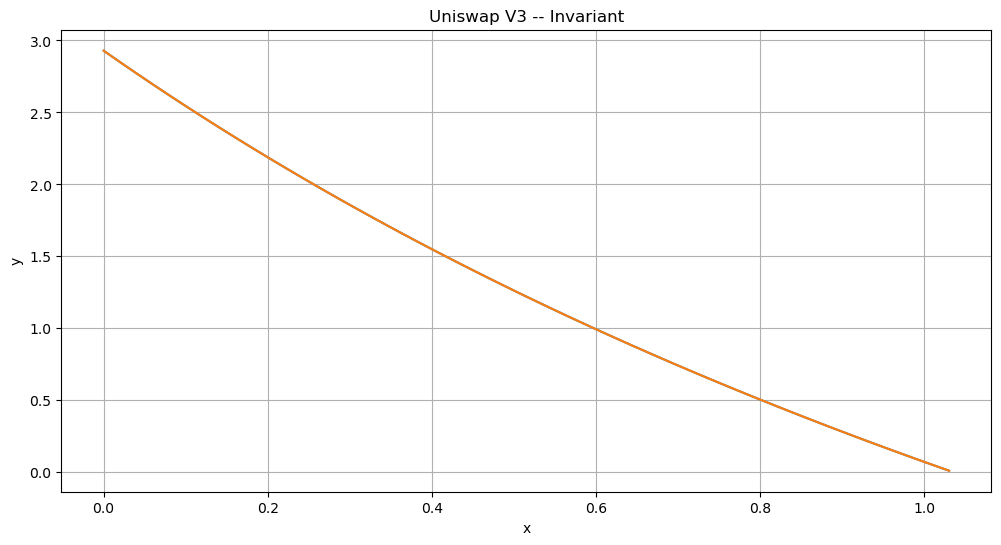

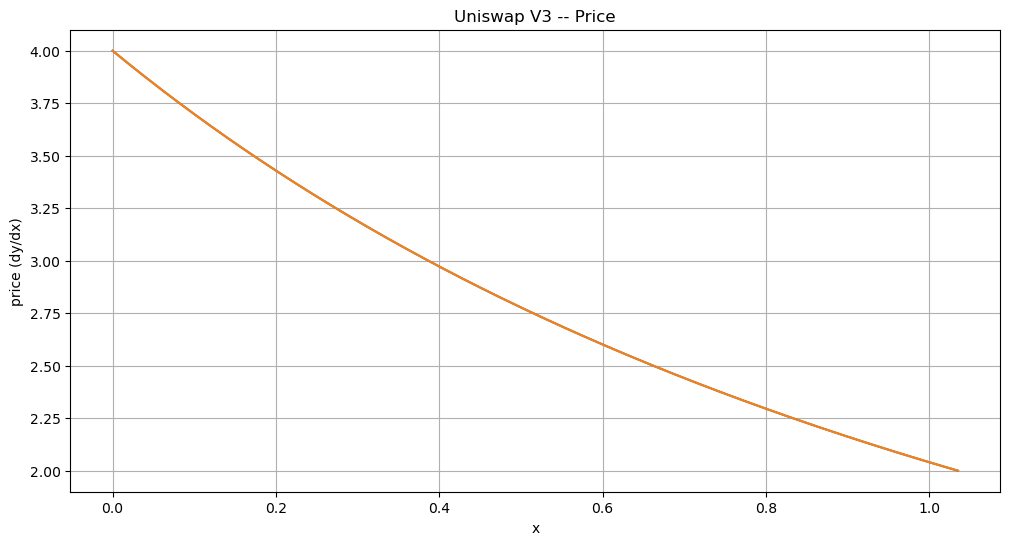

In [9]:
rg = (0,2)
assert f.UniV3 is f.UniV3Function
fn1 = f.UniV3(Pa=4, Pb=2, L=5)
fn2 = fn1.update(L=5)
for fn in [fn1, fn2]:
    print(fn)
    fn.plot(*rg, label=f"{p(fn)}")
plt.title("Uniswap V3 -- Invariant")
# plt.xlim(*xlim)
# plt.ylim(*ylim)
plt.show()

for fn in [fn1, fn2]:
    fn.plot(*rg, func=fn.p, label=f"{p(fn)}", steps=1000)
plt.title("Uniswap V3 -- Price")
plt.ylabel("price (dy/dx)")
# plt.xlim(*xlim)
# plt.ylim(*ylim)
plt.show()

### Levered constant product (Carbon)

[CarbonFunction] x0, y0: 4.26776695296637 12.071067811865479
[CarbonFunction] x0, y0: 4.26776695296637 12.071067811865479


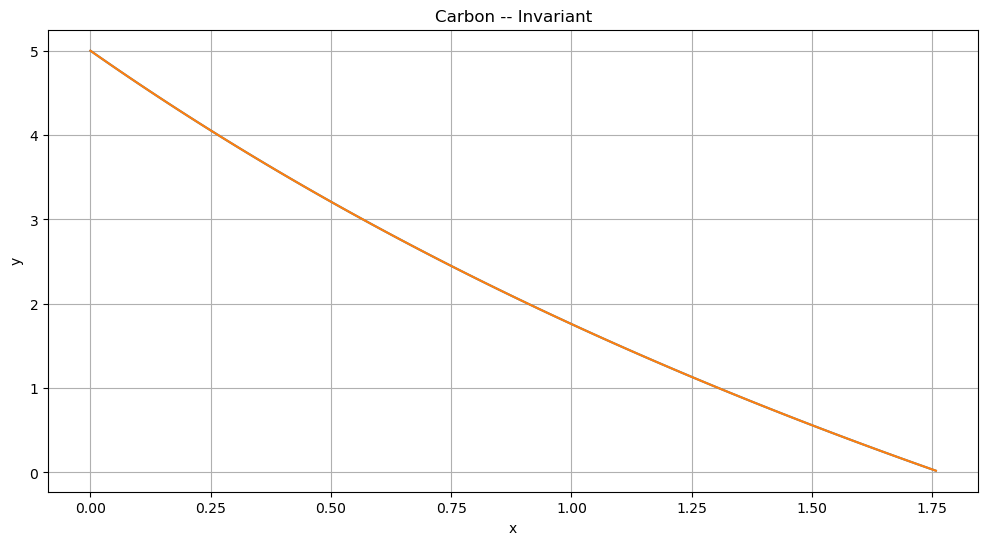

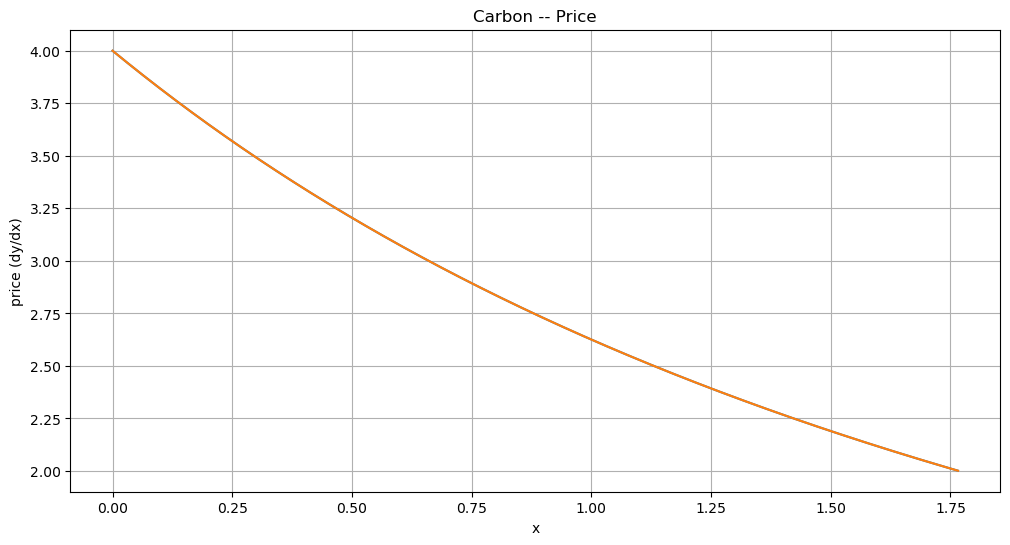

In [10]:
rg = (0,2)
assert f.Carbon is f.CarbonFunction
fn1 = f.Carbon(Pa=4, Pb=2, yint=5)
fn2 = fn1.update()
for fn in [fn1, fn2]:
    fn.plot(*rg, label=f"{p(fn)}")
plt.title("Carbon -- Invariant")
# plt.xlim(*xlim)
# plt.ylim(*ylim)
plt.show()

for fn in [fn1, fn2]:
    fn.plot(*rg, func=fn.p, label=f"{p(fn)}", steps=1000)
plt.title("Carbon -- Price")
plt.ylabel("price (dy/dx)")
# plt.xlim(*xlim)
# plt.ylim(*ylim)
plt.show()

## Other AMMs [NOTEST]

### Solidly

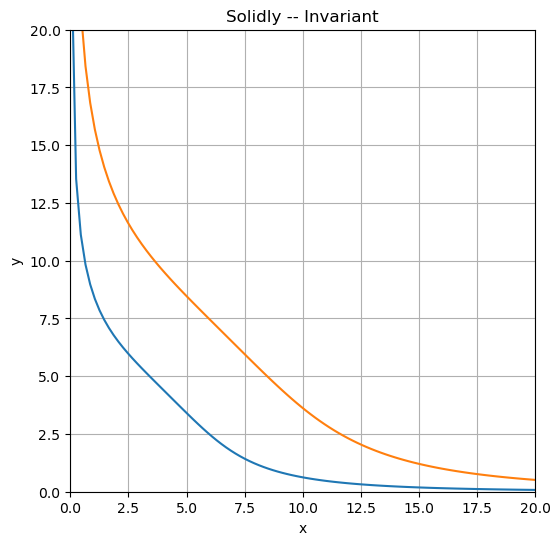

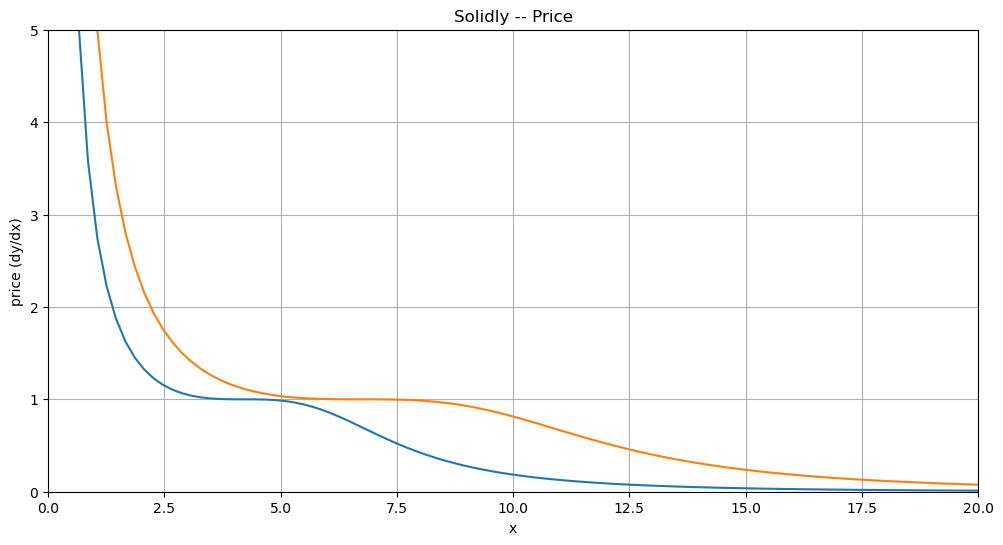

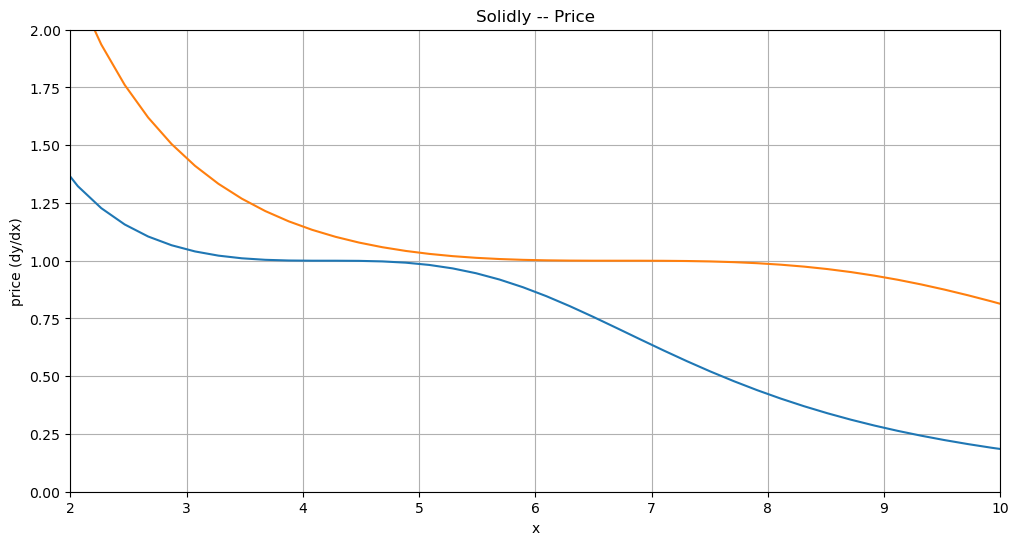

In [11]:
rg = (0.05,20)
plt.figure(figsize=(6,6))
assert f.Solidly is f.SolidlyFunction
fn1 = f.Solidly(k=5**4)
fn2 = fn1.update(k=8**4)
for fn in [fn1, fn2]:
    fn.plot(*rg, label=f"{p(fn)}")
plt.title("Solidly -- Invariant")
plt.xlim(0,20)
plt.ylim(0,20)
plt.show()

for fn in [fn1, fn2]:
    fn.plot(*rg, func=fn.p, label=f"{p(fn)}", steps=100)
plt.title("Solidly -- Price")
plt.ylabel("price (dy/dx)")
plt.xlim(0,20)
plt.ylim(0,5)
plt.show()

for fn in [fn1, fn2]:
    fn.plot(*rg, func=fn.p, label=f"{p(fn)}", steps=100)
plt.title("Solidly -- Price")
plt.ylabel("price (dy/dx)")
plt.xlim(2,10)
plt.ylim(0,2)
plt.show()